### 비지도 학습 Unsupervised Learning

비지도 학습은 레이블이 없는 데이터를 사용하는 학습을 말한다.

아래 그림은 비지도 학습의 종류 중 하나인 **군집화(클러스터링, Clustering)**를 분류와 비교한 것이다.

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

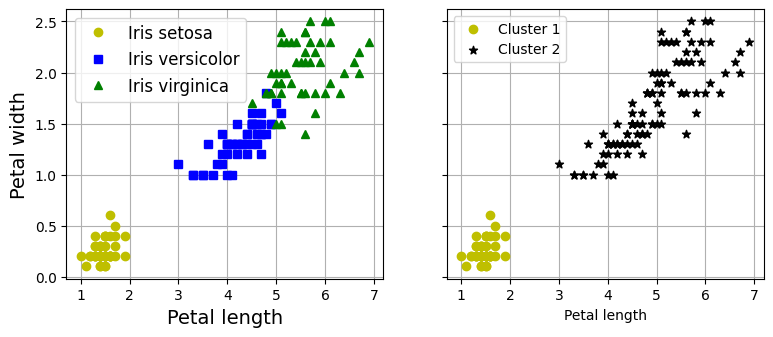

In [105]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.grid()
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[y==0, 2], X[y==0, 3], c="y", marker="o", label="Cluster 1")
plt.scatter(X[(y==1) | (y==2), 2], X[(y==1) | (y==2), 3], c="k", marker="*", label="Cluster 2")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()
plt.legend()

plt.show()

아래 코드는 가우스 혼합 모델을 사용한 군집화인데, 3개의 클래스로 분류가 잘 된 모습이다.

In [106]:
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

In [107]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id], keepdims=True)
    mapping[mode[0]] = class_id

mapping

{1: 0, 2: 1, 0: 2}

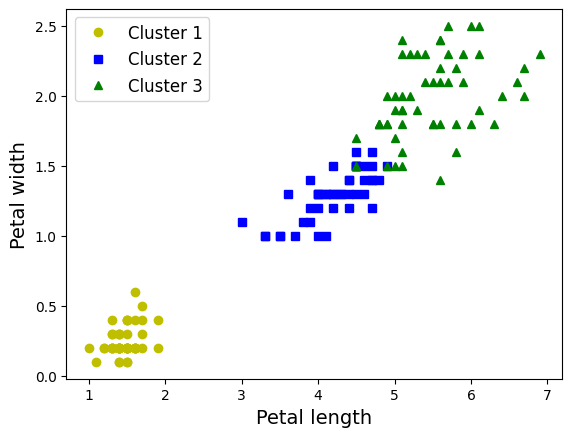

In [108]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)

plt.show()

### K Means

K-Means는 군집의 중심인 센트로이드를 지정한 수 만큼 찾은 후, 각 센트로이드에 가까운 데이터로 구성된 군집을 생성한다.

In [109]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

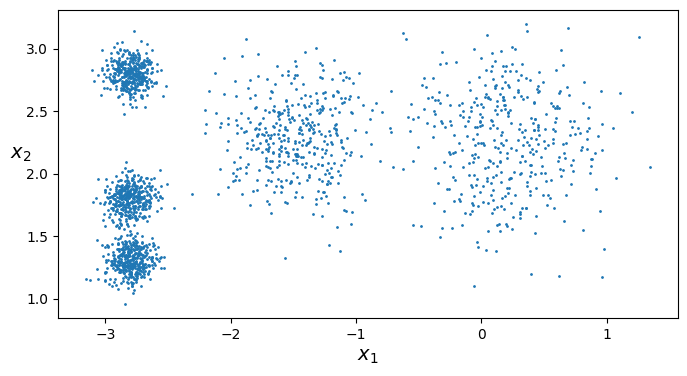

In [110]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)

plt.show()

이제 위의 5구역 정도 모여있는 데이터를 사용하여 K-Means 모델을 훈련시킨다.

In [111]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42) # n_clusters : 클러스터의 개수(군집의 개수)
y_pred = kmeans.fit_predict(X)

In [112]:
# 클러스터의 중심 좌표

kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

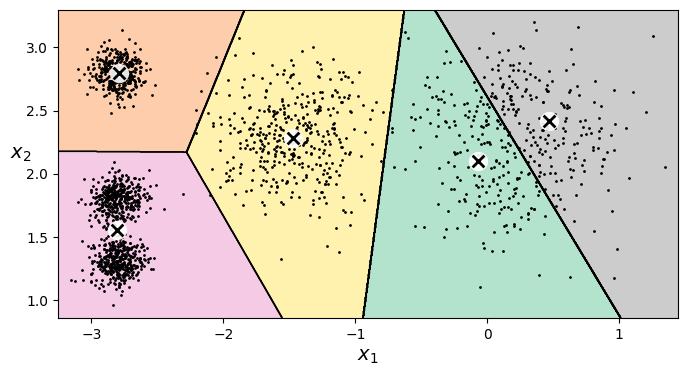

In [113]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

# K-Means 모델의 결과
# 5개의 군집이 형성되었으나 가장 우측 두 개의 군집이 하나의 군집으로, 왼쪽 아래의 군집이 두 개의 군집으로 분할되는 것이 더 좋아보인다.

K-Means의 변동성

K-Means 알고리즘은 센트로이드를 무작위로 초기화한다. 선택된 센트로이드에 따라서 다양한 종류의 군집이 나올 수 있다.

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

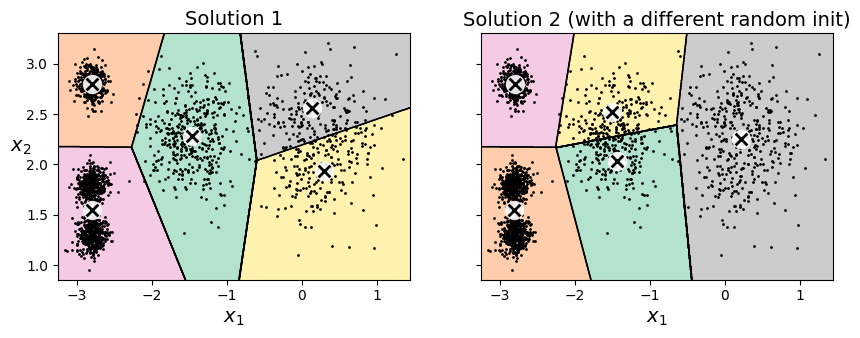

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="elkan", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="elkan", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

K-Means는 inertia 속성 값이 저장된다. inertia는 각각의 데이터가 가장 가까운 센트로이드까지 거리의 제곱의 합이며, 데이터가 얼마나 센트로이드에 모여있는지를 측정한다.

In [ ]:
kmeans.inertia_

224.0743312251571

센트로이드 초기화 수를 증가시켜 interia 속성의 값이 가장 작은 경우의 센트로이드를 사용한다.

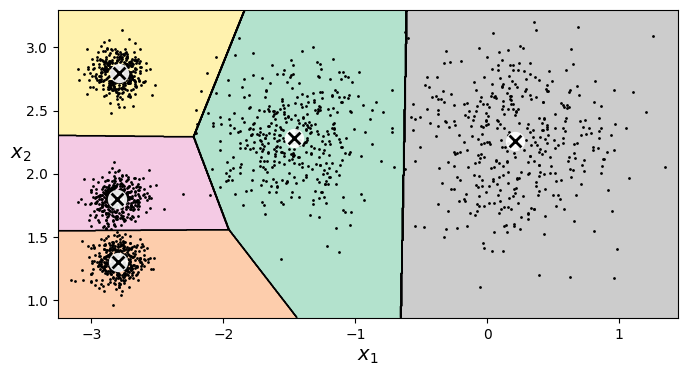

In [ ]:
# n_init 하이퍼파라미터를 10으로 지정하여 센트로이드 초기화를 10번 실행, 좋은 군집이 형성된것을 볼 수 있다.

kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10, random_state=2)
kmeans_rnd_10_inits.fit(X)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [ ]:
# inertia 값이 13 감소한 모습

kmeans_rnd_10_inits.inertia_

211.59853725816828

### 최적의 군집 수를 찾는 방법

아래 코드는 앞선 데이터의 군집 수가 3, 8인 경우를 보여준다.

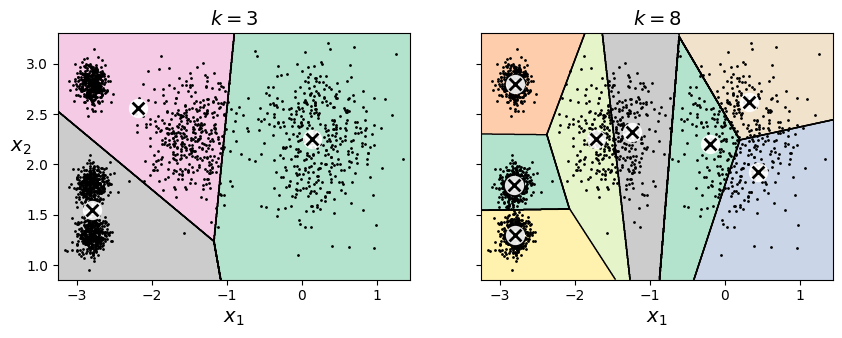

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")

plt.show()

In [ ]:
kmeans_k3.inertia_

653.2167190021554

In [ ]:
kmeans_k8.inertia_

127.13141880461835

방법 1. 센트로이드 수와 inertia 속성 값

센트로이드 수를 증가시키면 어느 순간부터 inertia 값의 감소량이 급격히 작아진다. 실제로 그래프만 보았을 때에는 어느 정도 좋은 군집화처럼 보인다.

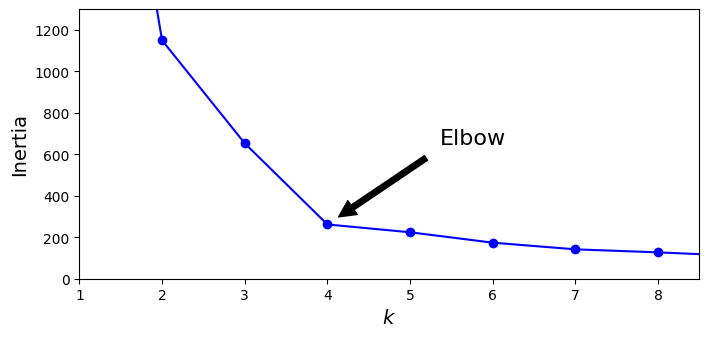

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

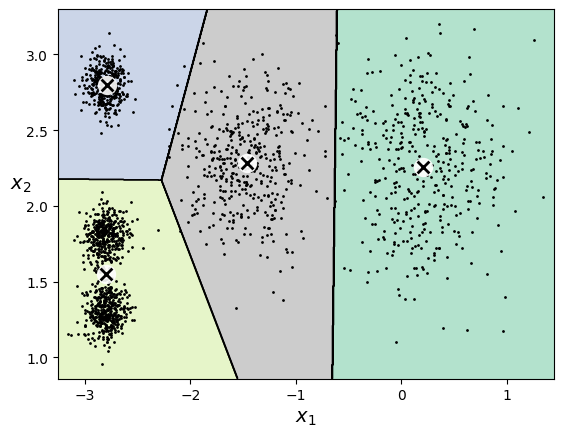

In [ ]:
plot_decision_boundaries(kmeans_per_k[4 - 1], X)
plt.show()

방법 2. 실루엣 점수

실루엣 점수는 다음과 같이 계산한다.



*   $a$ : 동일한 군집의 다른 데이터와의 거리의 평균
*   $b$ : 다른 군집의 데이터와의 거리의 평균



$$
\frac {b - a} {\max(a, b)}
$$

실루엣 점수는 (-1, 1) 사이의 값이며 다음 의미를 가지고 있다.



*   1에 가까움 : 적절한 군집, 분자가 양수이려면 b > a, 즉 다른 군집과의 거리가 더 크다는 뜻이다. $\frac {b-a} {b} \approx 1$
*   0에 가까움 : 군집의 경계, 다른 군집과의 거리와 현재 군집과의 거리가 거의 동일
*   -1에 가까움 : 부적절한 군집, 분자가 음수이려면 b < a, 즉 다른 군집과의 거리보다 현재 군집과의 거리가 더 크다는 뜻이다. $\frac {b-a} {a} \approx -1$



In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.6267891051050735

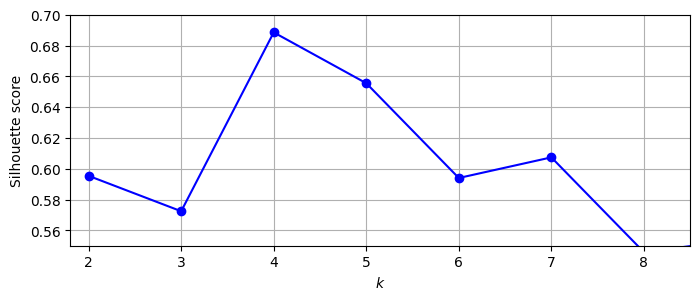

In [ ]:
# 군집 수에 따른 실루엣 점수, 여기서도 군집이 4개인 경우 가장 좋은 점수를 가진다.

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()

plt.show()

방법 3. 실루엣 다이어그램

실루엣 다이어그램은 칼날 모양으로 형태를 띄고 있는데, 이 칼날의 길이가 실루엣 점수보다 더 길게 형성되어 있는지, 군집들의 두께가 서로 비슷한지를 평가 기준으로 삼는다.

아래 그래프에서 볼 수 있듯이 군집 수가 4인 경우, 칼날 길이는 모두 실루엣 점수를 넘는다. 하지만 칼날 두께에서 큰 차이를 보인다. 군집 수가 5인 경우, 칼날 길이 모두 실루엣 점수를 넘으며 칼날 두께 또한 서로 비슷하다.

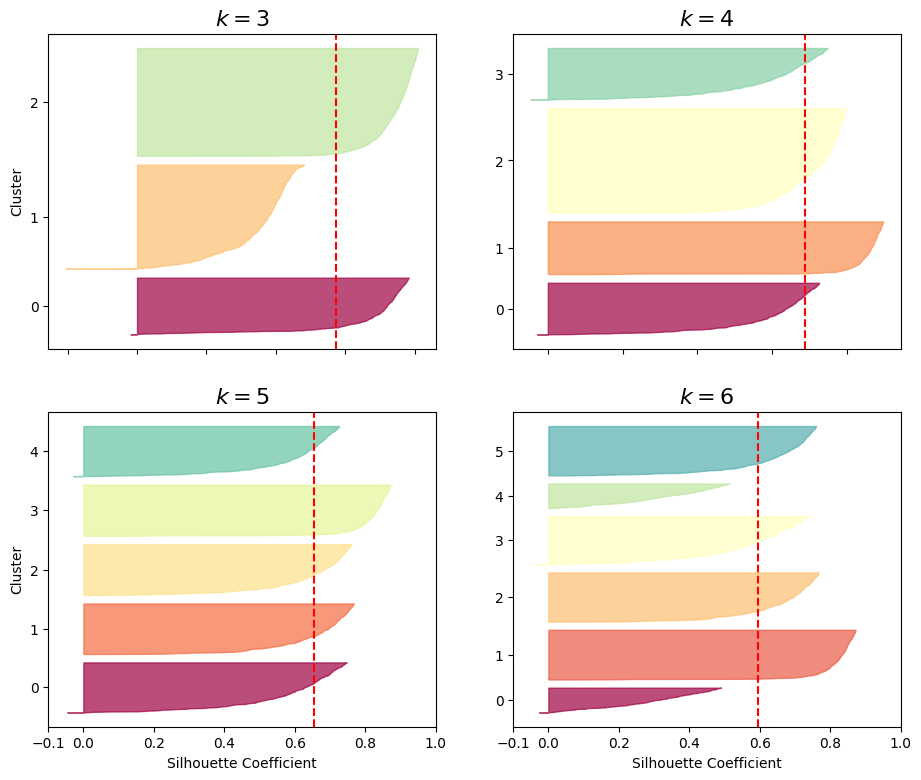

In [ ]:
# kmeans_per_k[4] = kmeans_rnd_10_inits 로 강제 삽입해서 약간 다를 수 있음

import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

K-Means의 한계점


1.   적절한 모델을 찾기 위해서는 어러차례 훈련해야 한다.
2.   군집 수를 미리 지정해야 한다.
3.   군집의 크기, 밀도가 다르거나 데이터가 원형이 아닌 경우 적절한 훈련이 되지 않는다.



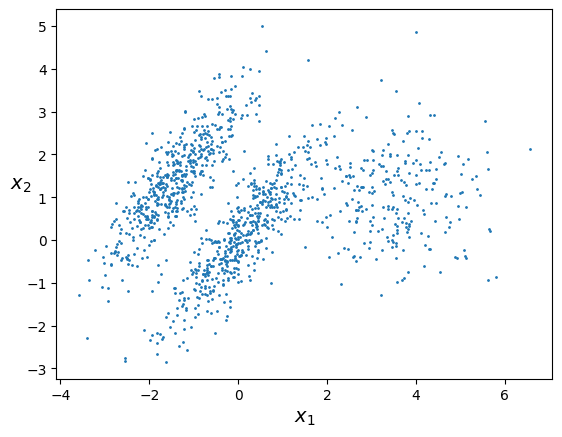

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_clusters(X)

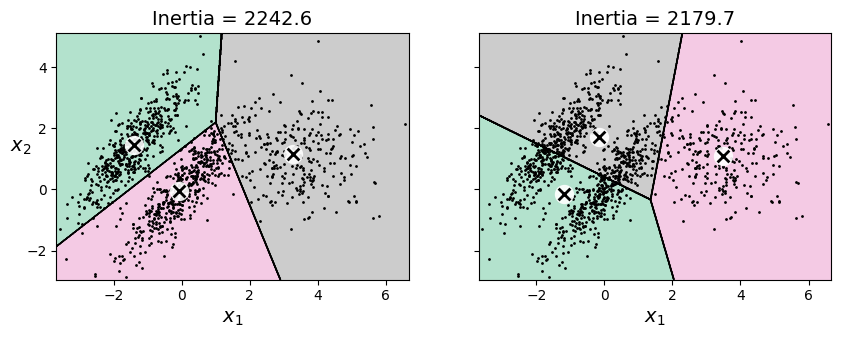

In [ ]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=40)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

# 아래 그래프는 데이터가 원형으로 분포하지 않아 적절한 군집화가 아니다. 또한 오른쪽 군집의 inertia는 왼쪽 군집보다 작지만 왼쪽 군집화가 더 좋아보인다.

### 군집화를 통한 이미지 분할

In [6]:
import urllib.request
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [7]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [8]:
# 이미지 데이터를 1차원 데이터로 변경

X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [11]:
n_colors = (10, 8, 6, 4, 2)
segmented_imgs = []

for n_clusters in n_colors:
    kmeans = KMeans(n_init=10, n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

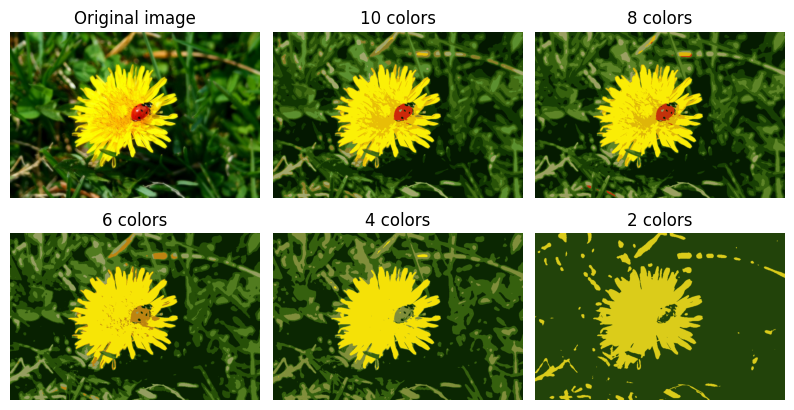

In [18]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

### 군집화를 이용한 준지도 학습

**준지도 학습 Semi-Supervised Learning**은 레이블이 있는 데이터 일부와 레이블이 없는 데이터 다수를 훈련시키는 학습 방법이다.

아래 코드는 (8, 8)크기의 작은 MNIST와 유사한 데이터를 군집화를 이용하여 학습하는 과정을 보여준다.

In [20]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

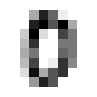

In [33]:
plt.figure(figsize = (1, 1))

plt.imshow(X_digits[0].reshape(8, -1), cmap = 'binary')
plt.axis('off')

plt.show()

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state = 42)

먼저 전체 데이터에 대해 로지스틱 회귀 모델을 훈련시킨 결과를 확인해본다.

In [40]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9688888888888889

전체 데이터에 군집화를 먼저 적용하면 정확도가 0.98까지 증가한다.

In [41]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

pipeline.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.98

단순히 50개의 데이터만 사용하여 로지스틱 회귀 모델을 적용하면 0.83의 정확도를 보인다.

In [42]:
n_labeled = 50

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.8333333333333334

50개의 군집을 지정하여 데이터를 군집화한 후, 센트로이드에 가장 가까운 데이터 50개만을 뽑아본다.

In [53]:
# 훈련 데이터는 1347개의 데이터로 구성되어 있다.

X_train.shape

(1347, 64)

In [57]:
k = 50

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train) # 데이터별 50개의 센트로이드와의 거리
representative_digit_idx = np.argmin(X_digits_dist, axis=0) # 1347개의 데이터 중 각 센트로이드에서 가장 가까운 데이터의 인덱스 (50개의 센트로이드와 가장 가까운 50개의 데이터)
X_representative_digits = X_train[representative_digit_idx] # 50개의 대표 이미지 선정
y_representative_digits = y_train[representative_digit_idx] # 50개의 대표 이미지의 레이블

In [51]:
X_digits_dist

array([[51.1856575 , 50.78717632, 40.28756989, ..., 55.70865772,
        44.59192845, 32.20286066],
       [45.92749906, 34.52800938, 49.59614847, ..., 26.54498754,
        40.89103137, 53.44980241],
       [41.94442955, 45.17179567, 40.30853437, ..., 47.61397809,
        42.90246964, 42.37615509],
       ...,
       [46.25360284, 18.79931385, 52.17066171, ..., 37.63581466,
        36.82000557, 50.44894115],
       [44.8398026 , 35.66336691, 47.12952086, ..., 44.50842617,
        39.19397091, 31.7550213 ],
       [50.05392868, 42.89735927, 44.55355566, ..., 49.44694126,
        33.74885979, 42.13018877]])

In [52]:
# 1347개의 데이터가 각각 50개의 센트로이드와 얼마나 떨어져있는가를 담고있는 정보

X_digits_dist.shape

(1347, 50)

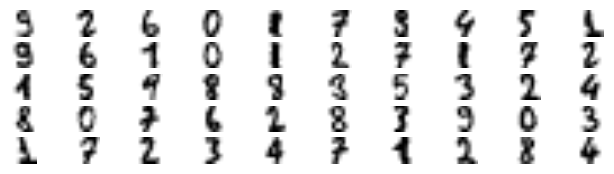

In [58]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

대표 이미지 50개만을 사용하여 훈련할 경우 성능이 0.913으로 증가한다.

In [59]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9133333333333333

이제 동일한 클러스터에 있는 데이터에 레이블을 전달하여 성능을 확인해보면 0.928로 성능이 더 높아졌다.

In [64]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

log_reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9288888888888889

하지만 클러스터에 모든 레이블을 동일하게 지정한다면 이상치의 레이블도 동일하게 지정되므로 오류가 발생할 수 있다.

센트로이드 거리 75% 이상인 데이터를 이상치로 지정하여 해당 데이터를 제거 후 훈련해본다.

In [72]:
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest) # 군집의 75%에 위치한 데이터
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1 # 75%의 거리보다 큰 경우 -1로 지정

In [73]:
partially_propagated = (X_cluster_dist != -1) # -1인 데이터를 제외
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

정확도가 0.937로 더 증가한것을 알 수 있다.

In [74]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

log_reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9377777777777778

### DBSCAN

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**은 데이터의 밀도가 높게 이어진 영역을 하나의 군집(클러스터)으로 지정하는 알고리즘이다. DBSCAN 사용 시 지정해야 하는 하이퍼파라미터는 다음과 같다.

*   $\epsilon$ : 각 데이터를 중심으로 형성되는 영역의 반지름 길이이다.
*   min_samples : 하나의 클러스터가 형성될 때 필요한 데이터의 개수이다.

In [118]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [119]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [120]:
# core_sample : 반경 epsilon 영역에 min_samples 이상의 데이터를 가지고 있는 데이터

len(dbscan.core_sample_indices_)

808

In [121]:
# components : core_sample의 특성 값

dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [122]:
# labels_ : 훈련 데이터의 예측된 군집 번호
# 첫 번째 DBSCAN은 총 8개의 레이블을 가진다.
# -1은 epsilon 반경 안에 자신을 제외한 데이터가 없는 경우 지정된다(이상치)

np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [123]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [124]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

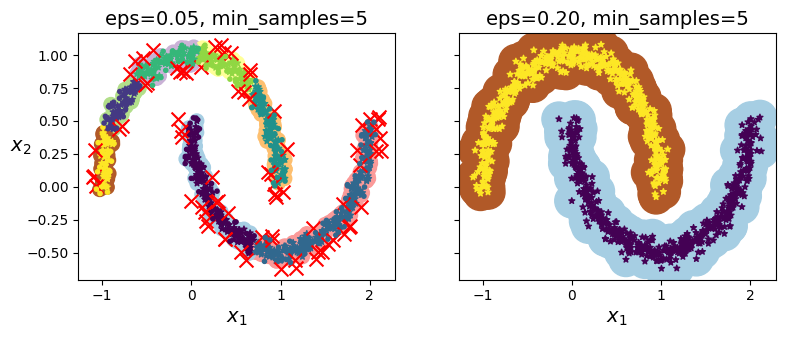

In [125]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

DBSCAN 모델은 predict() 메소드를 지원하지 않는다. 즉 새로운 데이터에 대한 예측은 사용할 수 없다.

따라서 KNeighborsClassifier와 같은 다른 모델을 사용하는데, 이때 DBSCAN으로 얻은 core sample을 입력 데이터로 사용할 수 있다.

In [126]:
# KNeighbors : K-최근접 이웃 알고리즘

from sklearn.neighbors import KNeighborsClassifier

dbscan = dbscan2

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [127]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

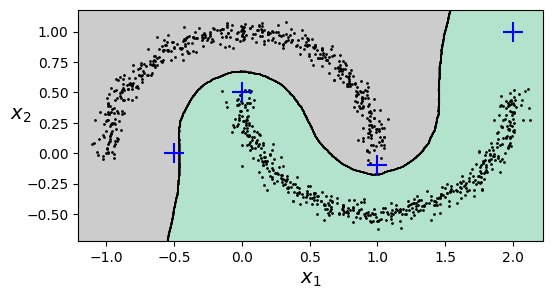

In [128]:
# 아래 이미지는 새로운 데이터에 대한 예측을 보여준다.
# 그런데 사실 군집에서 멀리 떨어진 두 개의 새 데이터는 이상치로 처리하는게 좋아보인다.

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

### 가우스 혼합 모델

**가우스 혼합 (Gaussian Mixtures)**모델(GMM)은 데이터셋이 서로 다른 가우스 분포를 따르는 데이터로 구성되어 있다고 가정한다.

앞서 KMeans의 한계점 파트에서 데이터가 서로 다른 밀도, 형태를 띄고 있다면 잘 동작하지 않았다. 아래 코드에서 해당 데이터를 활용하여 GMM을 훈련시켜본다.

In [129]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [130]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

가우스 혼합 모델은 다양한 정보를 포함하고 있다.

In [134]:
gm.weights_ # 클러스터별 데이터 비율

array([0.40005972, 0.20961444, 0.39032584])

In [138]:
gm.means_ # 군집의 평균 (K-Means의 센트로이드 정도로 생각할 수 있음)

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [135]:
gm.covariances_ # 클러스터 공분산

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [136]:
gm.converged_ # 군집화 성공 여부

True

In [137]:
gm.n_iter_ # 군집화에 필요한 초기화 수

4

가우스 혼합 모델은 생성 모델로, 새로운 데이터를 생성할 수 있다.

In [132]:
X_new, y_new = gm.sample(6)

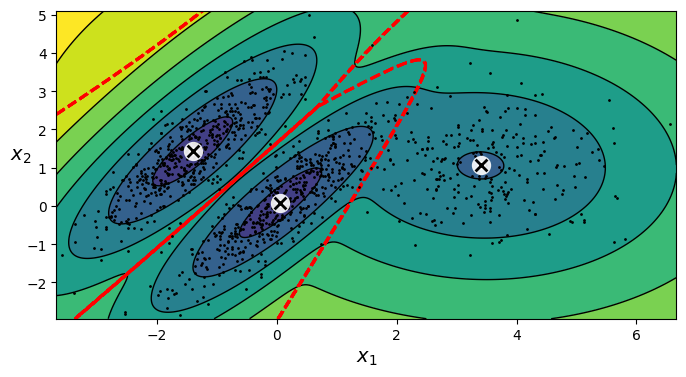

In [133]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

# X : 군집 평균
# 빨간색 실선 : 결정 경계
# 등고선 : 파란색에 가까울수록 밀도가 높음

`covariance_type` 하이퍼파라미터를 사용하여 알고리즘의 공분산에 규제를 추가할 수 있다.

*   full : 기본값, 규제 없음. 크기와 모양이 자유로운 타원
*   tied : 모든 클러스터가 동일한 모양을 가져야 함. 모든 클러스터는 동일한 공분산 행렬을 가짐
*   spherical : 모든 클러스터는 원형 모양. 크기는 자유로움
*   diag : 모든 클러스터의 크기와 모양이 자유롭지만 타원의 축이 좌표축에 평행해야 함



In [139]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [140]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

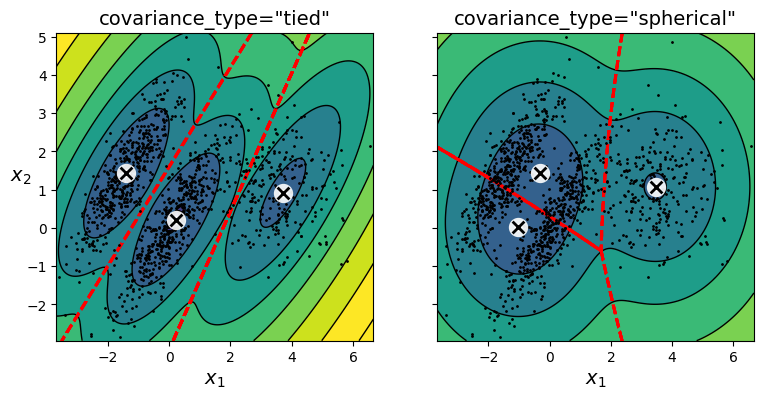

In [141]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

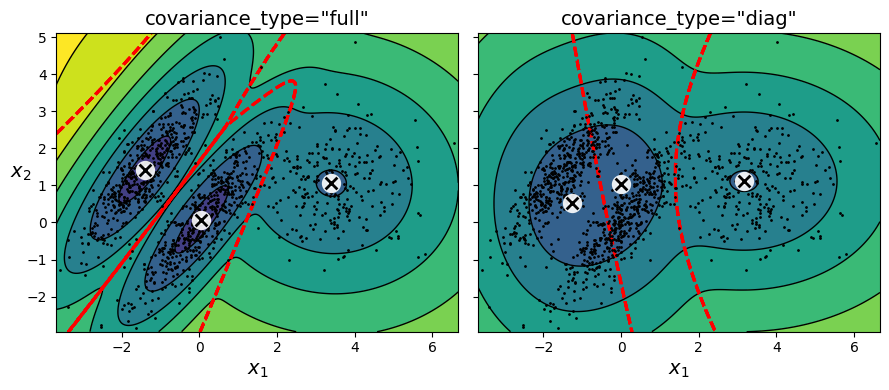

In [142]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

가우스 혼합 모델을 사용한 이상치 탐지

In [143]:
# density threshold (밀도 임계값)를 지정하여 임계값 이하의 밀도를 가진 데이터를 이상치로 지정한다.

densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

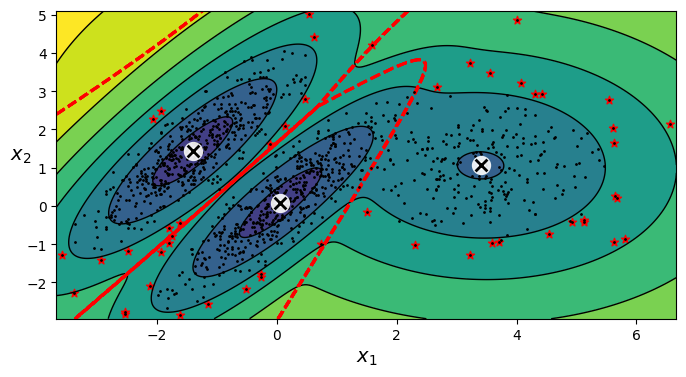

In [144]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

적절한 클러스터 수 선택하기

K-Means에서 활용되었던 inertia, 실루엣 점수는 클러스터가 구형이라는 가정에 기반하기 때문에 사용할 수 없다. 그 대신에 **베이지안 정보 기준 BIC (Bayesian Information Criterion)**과 **아카이케 정보 기준 AIC (Akaike Information Criterion)**을 사용할 수 있다.

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$



*   $m$ : 데이터 수
*   $p$ : 모델이 학습한 파라미터 수
*   $\hat L$ : 모델이 최적화된 매개변수를 사용했을 때 계산되는 함수값



In [150]:
gm.bic(X), gm.aic(X)

(8189.733705221636, 8102.508425106598)

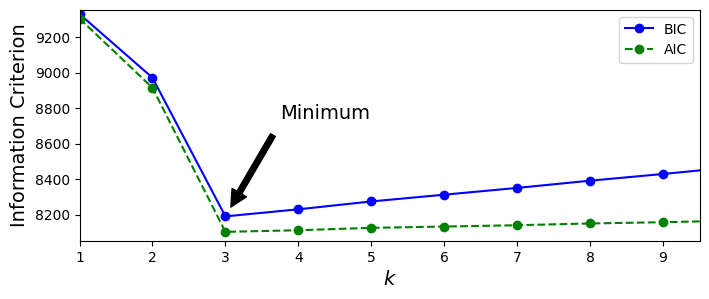

In [147]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()

plt.show()

In [151]:
# 최적의 클러스터와 군집화 방식 탐색

min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [152]:
best_k, best_covariance_type

(3, 'full')

베이지안 가우스 혼합 모델

**베이지안 가우스 혼합 모델 Bayesian Gaussian Mixture Model(BGMM)**은 최적의 군집수를 알아서 지정한다. 필요하지 않은 군집에 대해 가중치를 0에 가깝게 설정한다.

`n_components` 하이퍼파라미터를 지정하여 자동으로 필요없는 클러스터를 제거한다.

In [153]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [154]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

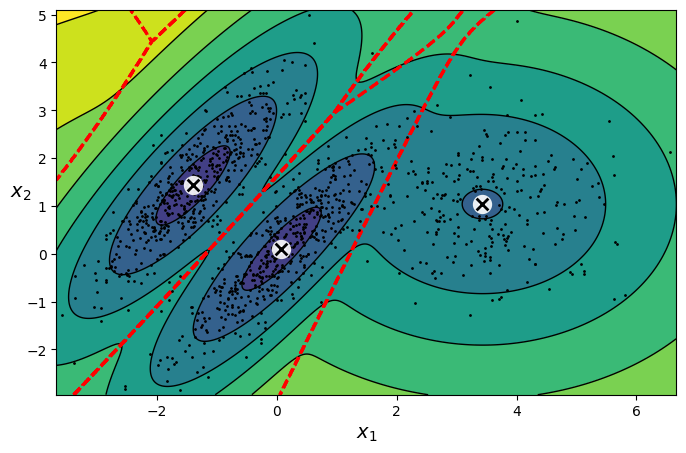

In [155]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

`weight_concentration_prior`를 사용하여 가중치가 어떻게 분포할지 선택할 수 있다.



*   값이 작을 때 < 1 : 소수의 클러스터가 대부분의 데이터를 차지함, 가중치가 0에 가깝도록 만듦
*   값이 클 때 > 1 : 클러스터 가중치가 더 넓고 균등하게 분포, 많은 클러스터가 활성화, 각 클러스터가 비슷한 비율로 데이터를 포함



In [164]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

In [165]:
np.round(bgm_low.weights_, 2)

array([0.25, 0.26, 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [166]:
np.round(bgm_high.weights_, 2)

array([0.43, 0.01, 0.37, 0.01, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01])

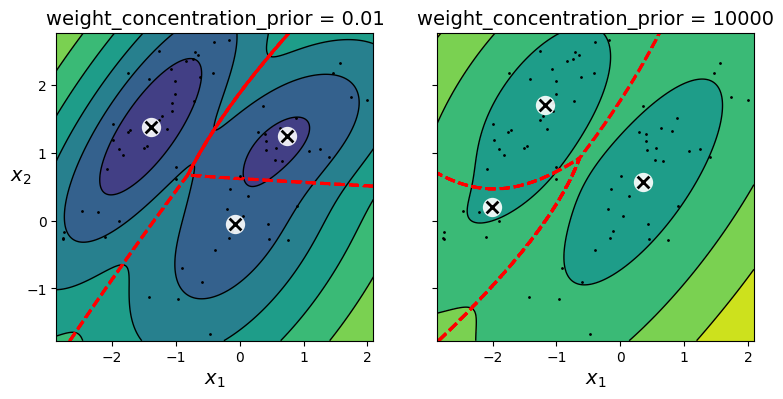

In [167]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

plt.show()

가우스 혼합 모델의 단점

가우스 혼합 모델은 타원형으로 이루어진 군집을 잘 파악한다. 하지만 moons 데이터셋과 같은 형태라면 억지로 타원형을 여러 개 만들어낸다.

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


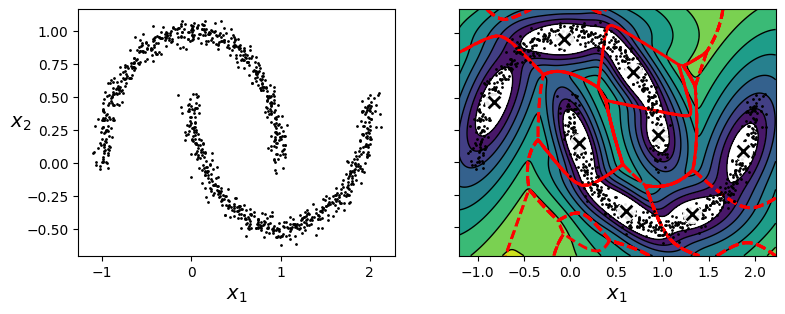

In [168]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()